In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.25)

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
print('Fraud shape: {}, Normal shape: {}'.format(fraud.shape, normal.shape))

Fraud shape: (492, 31), Normal shape: (284315, 31)


Determine the distribution between transcation that are fraudulant and those that are normal

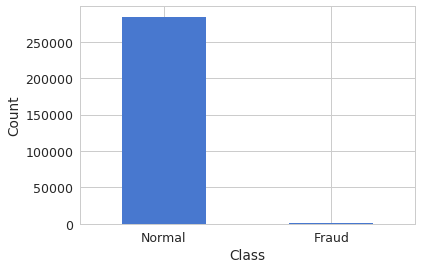

In [47]:
class_count = pd.value_counts(df['Class'])
class_count.plot(kind='bar', rot=0)
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

From the graph above, it is clear there is a huge imbalance between Normal and Fraud transcations. A simple villina prectron wont work. The difference between the amount of money spend on each transcation

In [30]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [31]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

ValueError: not enough values to unpack (expected 4, got 2)

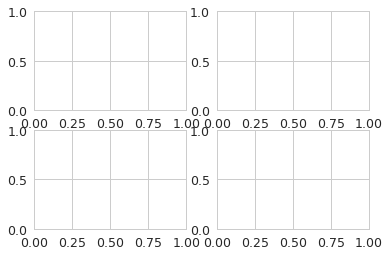

In [65]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(2,2)
ax1.plot(normal['Amount'])
ax2.plot(fraud['Amount'])
ax3.plot(df['Amount'])
ax4.plot(df['Amount'])
plt.show()

The mean amount spend for both transcations is very close, a difference of only $40. However the maximum amount spend is greater in a normal transcation by one order of magnitude. That might be useful.

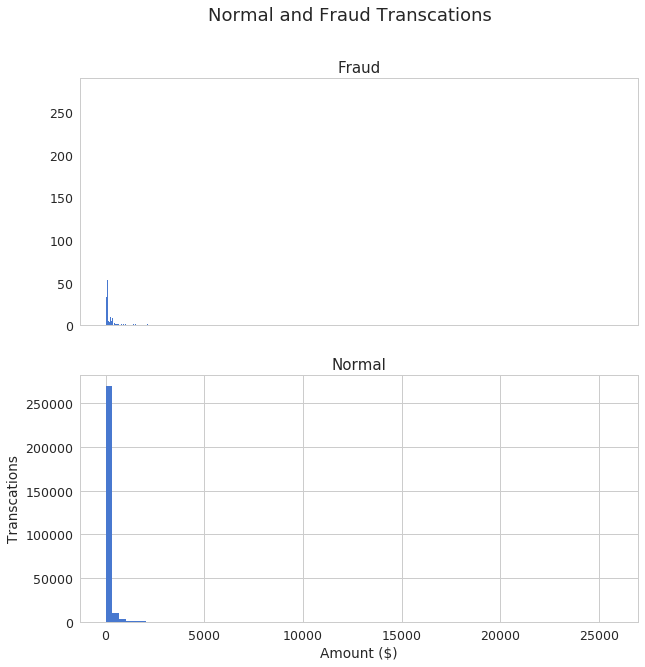

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
bins = 75
fig.suptitle('Normal and Fraud Transcations')
fig.set_figheight(10)
fig.set_figwidth(10)

ax1.set_title('Fraud')
ax1.hist(fraud['Amount'], bins=bins)
ax1.grid()

ax2.set_title('Normal')
ax2.hist(normal['Amount'], bins=bins)
ax2.grid()

plt.xlabel('Amount ($)')
plt.ylabel('Transcations')
plt.grid()
plt.show()